##### Importing Packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime

##### Loading Data

In [3]:
TASK_PATH = r"C:\Users\jpgsa\Documents\BOLT" + "\\"
file1 = "Dataset Task 2.xlsx"
df1_raw = pd.read_excel(TASK_PATH + file1, sheet_name = "Data")

df1_raw.head()

,Created Date,Country,City,Restaurant ID,Restaurant Name,Order State,Cancel Reason,Cuisine,Platform,Payment Method,Card Issuer,Products in Order,Order Value € (Gross),Delivery Fee,Delivery Time
0,28.02.2020,Portugal,Lisbon,7238,Chirashi - Alvalade,delivered,NaN,Sushi,ios,cashless,BANKINTER S.A.,13,89.30,0.0,17.7
1,28.02.2020,Portugal,Lisbon,12758,Istanbul Kebab Pizza - Alameda,delivered,NaN,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1,10.00,0.0,16.3
2,28.02.2020,Portugal,Lisbon,6631,A-100 - Lisboa,delivered,NaN,Burgers,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,2,16.96,0.0,13.6
3,28.02.2020,Portugal,Lisbon,10535,La Paparrucha - Parrilla Argentina,delivered,NaN,South American,ios,cashless,ING BANK N.V.,3,25.15,4.2,26.1
4,28.02.2020,Portugal,Lisbon,9695,Choupana Caffe,delivered,NaN,Brunch,ios,cashless,INTESA SANPAOLO SPA,3,16.00,0.0,11.6


##### Questions to be answered:

1. Do we have any seasonality in the countries shown?
2. Use your knowledge to predict with the available data. How many orders we will have in March 2020 in each country shown?
3. Please tell us any other valuable insight that you can extract from the data available and what would you do to solve it.

##### 1) Seasonality

In [9]:
df1_raw.groupby(["Country","City"]).count()["Created Date"]

Country   City  
Ghana     Accra     14132
Portugal  Lisbon    85486
Name: Created Date, dtype: int64

##### 1.1) Exploring Portugal's Dataset

In [87]:
df_portugal = df1_raw[df1_raw["Country"] == "Portugal"].copy()

metrics = ["Products in Order",
           "Order Value € (Gross)"]

df_portugal = df_portugal[["Created Date"] + metrics]

df_portugal["Created Date"] = pd.to_datetime(df_portugal["Created Date"], format="%d.%m.%Y")
df_portugal["# Orders"] = 1 ## placeholder to get count of orders

df_portugal_grouped = df_portugal.groupby("Created Date").sum().reset_index()

weekref = {0:'2 - Monday', 1:'3 - Tuesday', 2:'4 - Wednesday ', 3:'5 - Thursday', 4:'6 - Friday', 5:'7 - Saturday', 6:'1 - Sunday'}
df_portugal_grouped["Week Day"] = df_portugal_grouped["Created Date"].apply(lambda x: weekref[x.weekday()])
df_portugal_grouped["Week of Year"] = df_portugal_grouped["Created Date"].apply(lambda x: x.isocalendar()[1])
df_portugal_grouped["AOV"] = df_portugal_grouped["Order Value € (Gross)"] / df_portugal_grouped["# Orders"]

Text(0.5, 1.0, 'Orders in Portugal - Daily')

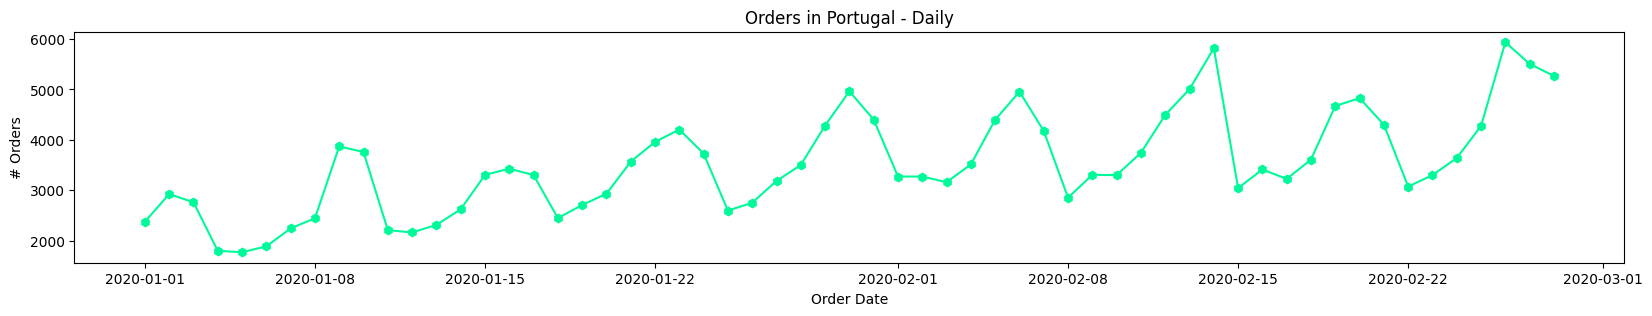

In [62]:
plt.figure(figsize=(20,3))
plt.plot(df_portugal_grouped ["Created Date"], df_portugal_grouped ["Products in Order"], marker = "h", color = "mediumspringgreen")
plt.xlabel('Order Date')  
plt.ylabel('# Orders')  
plt.title("Orders in Portugal - Daily") 

Text(0.5, 1.0, 'Gross Revenue in Portugal - Daily')

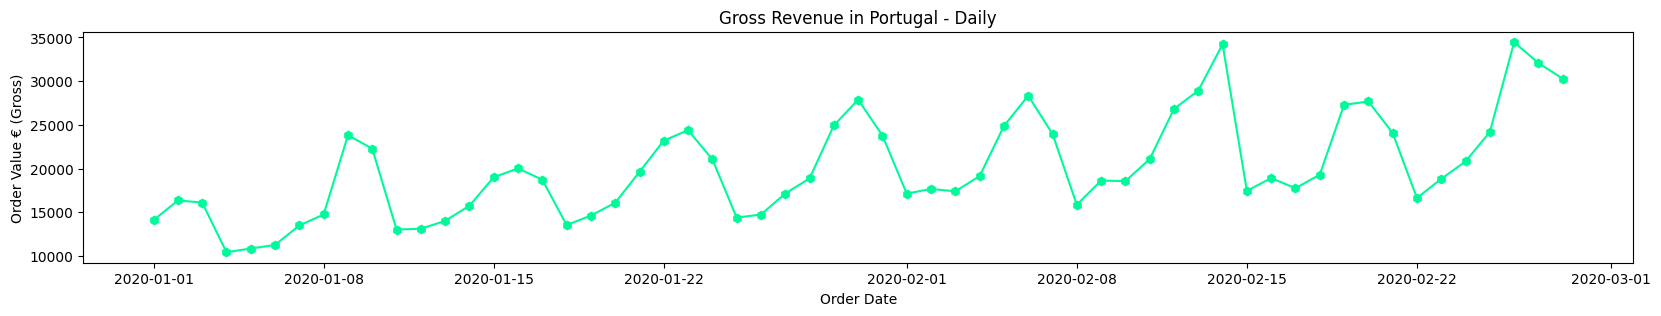

In [43]:
plt.figure(figsize=(20,3))
plt.plot(df_portugal_grouped ["Created Date"], df_portugal_grouped ["Order Value € (Gross)"], marker = "h", color = "mediumspringgreen")
plt.xlabel('Order Date')  
plt.ylabel('Order Value € (Gross)')  
plt.title("Gross Revenue in Portugal - Daily") 

Text(0.5, 1.0, 'AOV in Portugal - Daily')

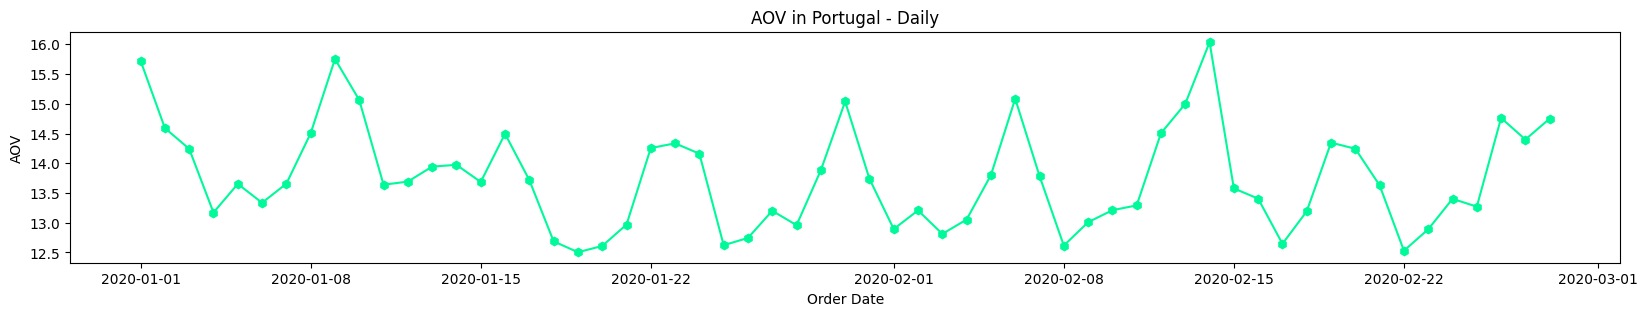

In [65]:
plt.figure(figsize=(20,3))
plt.plot(df_portugal_grouped ["Created Date"], df_portugal_grouped ["AOV"], marker = "h", color = "mediumspringgreen")
plt.xlabel('Order Date')  
plt.ylabel('AOV')  
plt.title("AOV in Portugal - Daily") 

In [115]:
df_portugal_grouped_week_ref = df_portugal_grouped[["Week of Year", "Order Value € (Gross)", "# Orders"]]
df_portugal_grouped_week_ref = df_portugal_grouped_week_ref.groupby("Week of Year").sum()
df_portugal_grouped_week_ref = df_portugal_grouped_week_ref.rename(columns={"Order Value € (Gross)": "Order Value € (Gross) (Week)",
                                                                            "# Orders": "# Orders (Week)"})
df_portugal_grouped_week_ref = df_portugal_grouped_week_ref.reset_index()
df_portugal_grouped = df_portugal_grouped.merge(df_portugal_grouped_week_ref, how ='inner')

df_portugal_grouped["perc. of weekly orders"] = df_portugal_grouped["# Orders"]  / df_portugal_grouped["# Orders (Week)"] 
df_portugal_grouped["perc. of weekly revenue"] = df_portugal_grouped["Order Value € (Gross)"]  / df_portugal_grouped["Order Value € (Gross) (Week)"] 

# df_portugal_grouped.groupby("Week of Year").count()["Created Date"]
# We'll only use weeks to 2 to 8 to to the "day of week" evaluation, since weeks 1 and 9 only have 5 days

df_portugal_grouped_2 = df_portugal_grouped [(df_portugal_grouped["Week of Year"] > 1) & (df_portugal_grouped["Week of Year"] < 9)]
df_portugal_grouped_2 = df_portugal_grouped_2 [["Week Day","perc. of weekly orders","perc. of weekly revenue"]]

<Axes: >

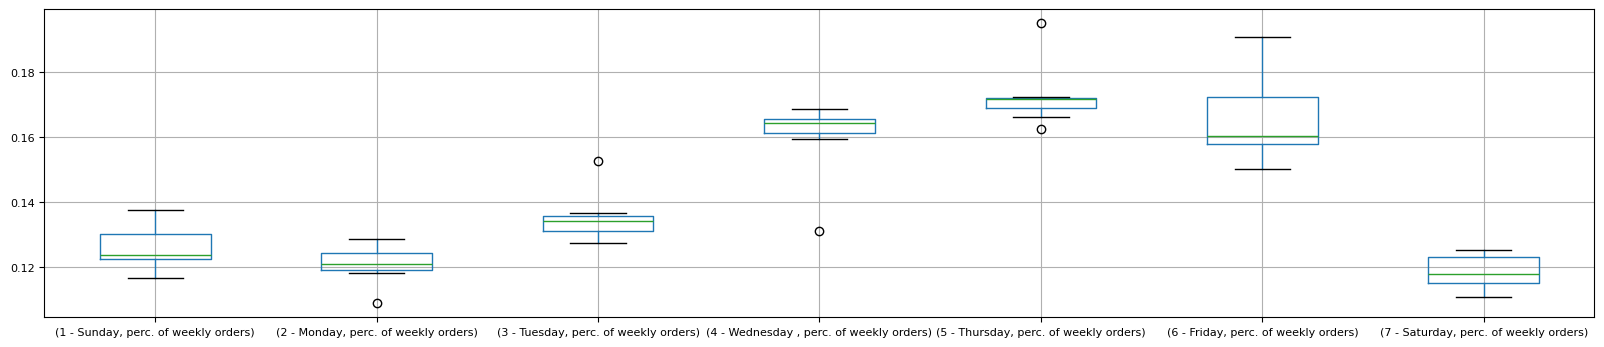

In [117]:
perc_orders_weekly = df_portugal_grouped_2[["Week Day","perc. of weekly orders"]].groupby("Week Day")
perc_orders_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

<Axes: >

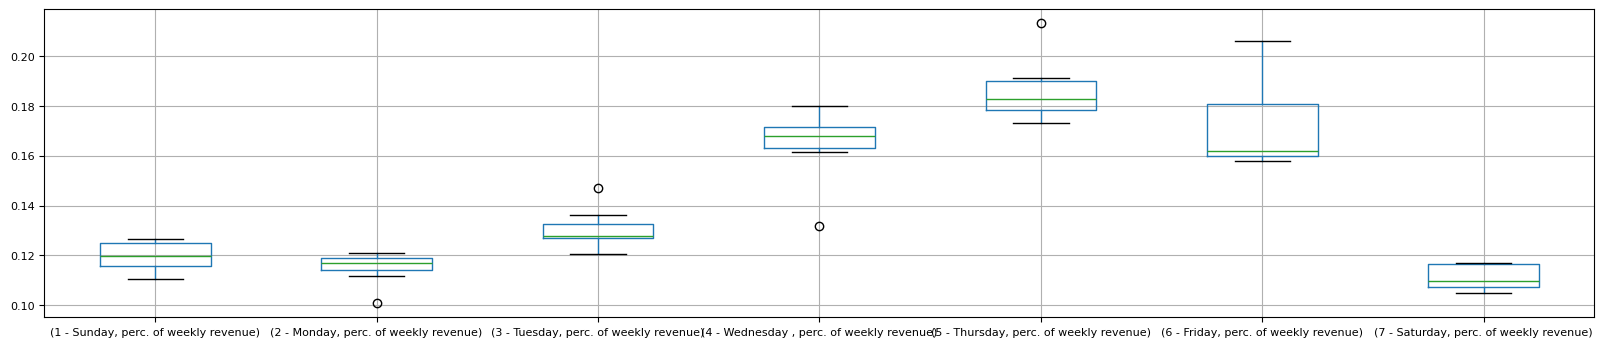

In [118]:
perc_revenue_weekly = df_portugal_grouped_2[["Week Day","perc. of weekly revenue"]].groupby("Week Day")
perc_revenue_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

<Axes: >

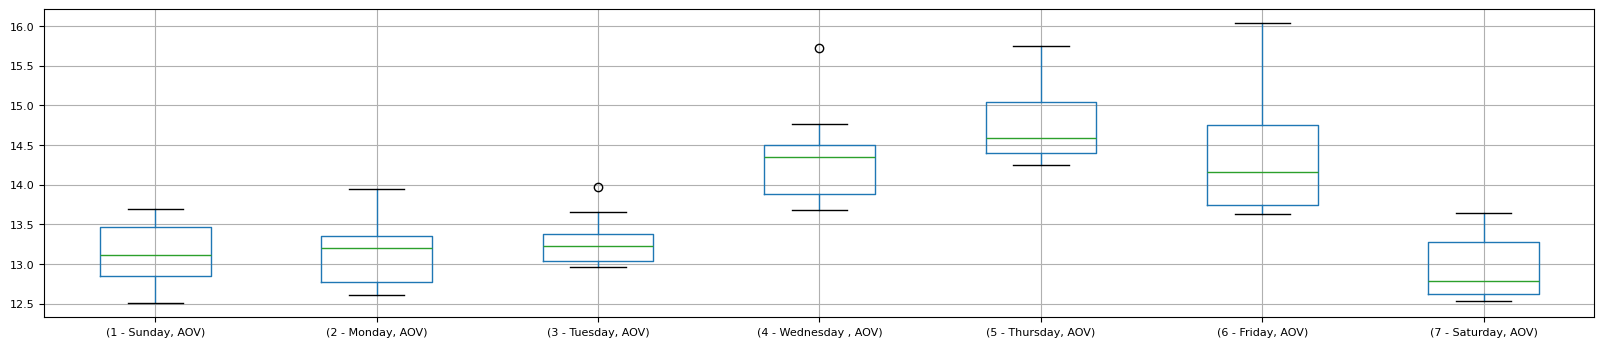

In [124]:
aov_weekly = df_portugal_grouped[["Week Day", "AOV"]].groupby("Week Day")
aov_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

Text(0.5, 1.0, 'Gross Revenue Weekly - Portugal')

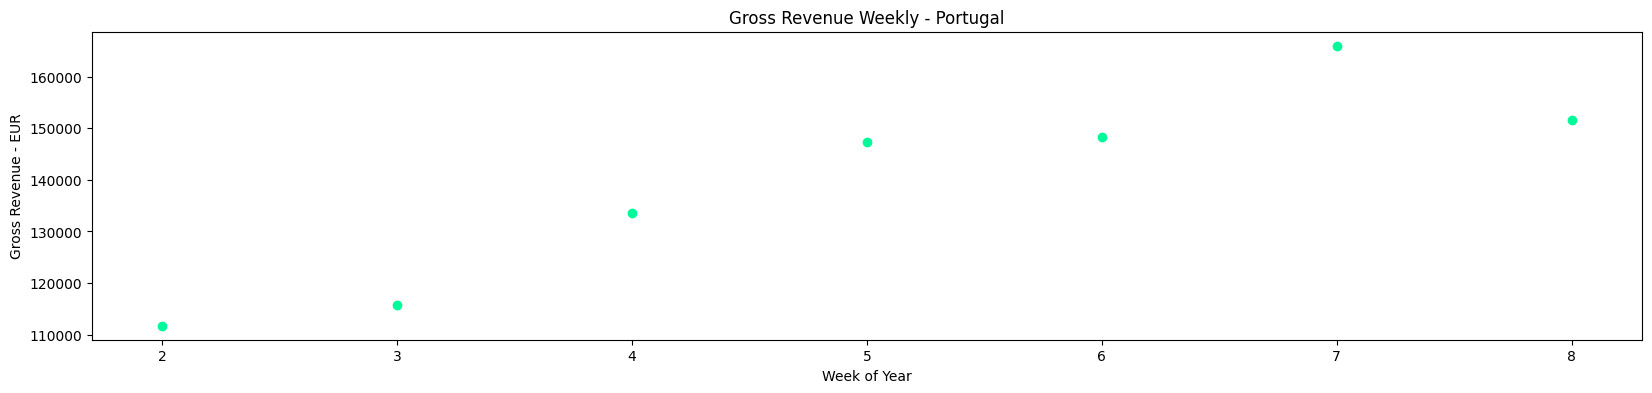

In [173]:
plt.figure(figsize=(20,4))
df_portugal_grouped_week_plot = df_portugal_grouped_week_ref [(df_portugal_grouped_week_ref["Week of Year"] > 1)
                                                              & (df_portugal_grouped_week_ref["Week of Year"] < 9)]
plt.scatter(df_portugal_grouped_week_plot ["Week of Year"]
            , df_portugal_grouped_week_plot ["Order Value € (Gross) (Week)"]
            , color = "mediumspringgreen")

plt.ylabel("Gross Revenue - EUR")  
plt.xlabel("Week of Year")  
plt.title("Gross Revenue Weekly - Portugal") 

Text(0.5, 1.0, '# Orders Weekly - Portugal')

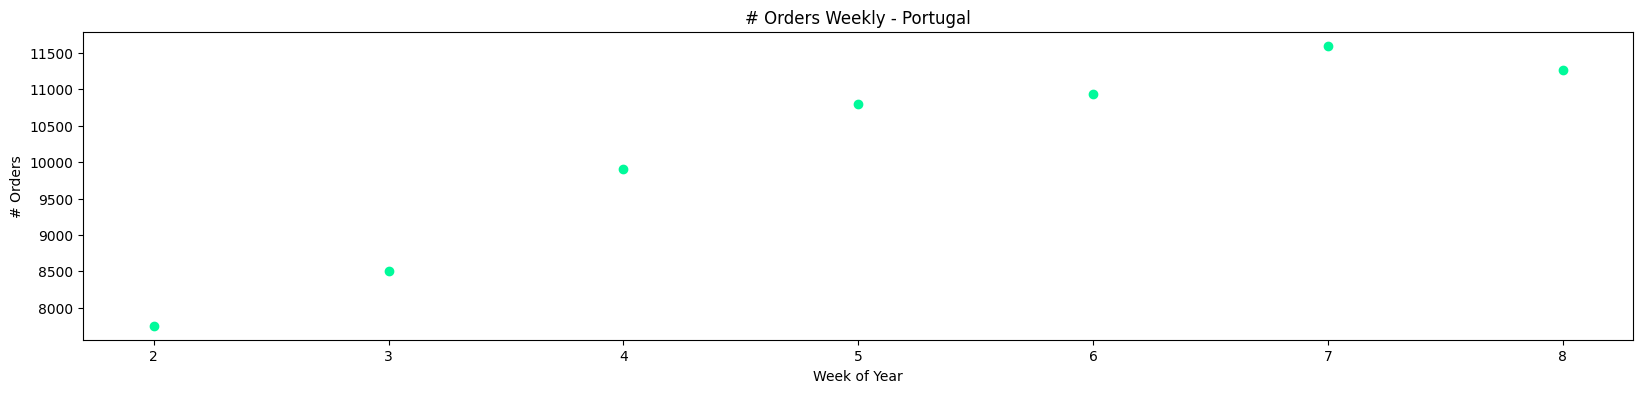

In [172]:
plt.figure(figsize=(20,4))
df_portugal_grouped_week_plot = df_portugal_grouped_week_ref [(df_portugal_grouped_week_ref["Week of Year"] > 1)
                                                              & (df_portugal_grouped_week_ref["Week of Year"] < 9)]
plt.scatter(df_portugal_grouped_week_plot ["Week of Year"]
            , df_portugal_grouped_week_plot ["# Orders (Week)"]
            , color = "mediumspringgreen")

plt.ylabel("# Orders")  
plt.xlabel("Week of Year")  
plt.title("# Orders Weekly - Portugal") 

##### Conclusions for Portugal:
* a
* b

##### 1.2) Exploring Ghana's Dataset

In [154]:
df_ghana = df1_raw[df1_raw["Country"] == "Ghana"].copy()

metrics = ["Products in Order",
           "Order Value € (Gross)"]

df_ghana = df_ghana[["Created Date"] + metrics]

df_ghana["Created Date"] = pd.to_datetime(df_ghana["Created Date"], format="%d.%m.%Y")
df_ghana["# Orders"] = 1 ## placeholder to get count of orders

df_ghana_grouped = df_ghana.groupby("Created Date").sum().reset_index()

weekref = {0:'2 - Monday', 1:'3 - Tuesday', 2:'4 - Wednesday ', 3:'5 - Thursday', 4:'6 - Friday', 5:'7 - Saturday', 6:'1 - Sunday'}
df_ghana_grouped["Week Day"] = df_ghana_grouped["Created Date"].apply(lambda x: weekref[x.weekday()])
df_ghana_grouped["Week of Year"] = df_ghana_grouped["Created Date"].apply(lambda x: x.isocalendar()[1])
df_ghana_grouped["AOV"] = df_ghana_grouped["Order Value € (Gross)"] / df_ghana_grouped["# Orders"]

Text(0.5, 1.0, 'Orders in Ghana - Daily')

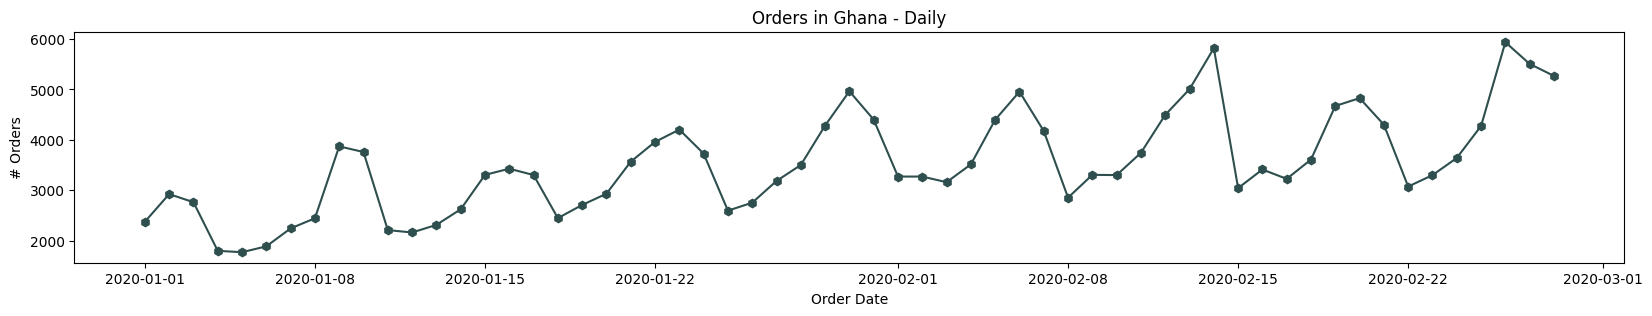

In [157]:
plt.figure(figsize=(20,3))
plt.plot(df_portugal_grouped ["Created Date"], df_portugal_grouped ["Products in Order"], marker = "h", color = "darkslategrey")
plt.xlabel('Order Date')  
plt.ylabel('# Orders') 
plt.title("Orders in Ghana - Daily") 

Text(0.5, 1.0, 'Gross Revenue in Ghana- Daily')

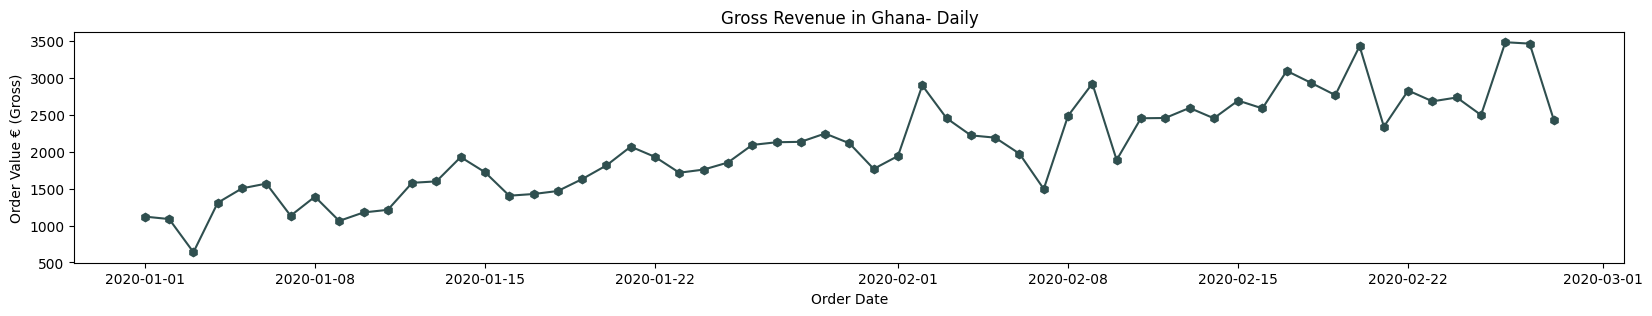

In [159]:
plt.figure(figsize=(20,3))
plt.plot(df_ghana_grouped ["Created Date"], df_ghana_grouped ["Order Value € (Gross)"], marker = "h", color = "darkslategrey")
plt.xlabel('Order Date')  
plt.ylabel('Order Value € (Gross)')  
plt.title("Gross Revenue in Ghana- Daily") 

Text(0.5, 1.0, 'AOV in Ghana - Daily')

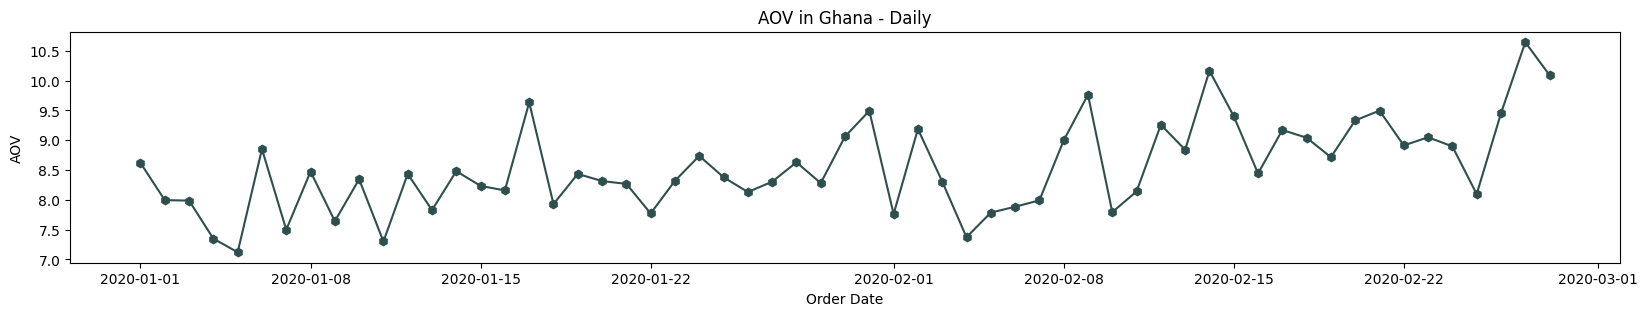

In [161]:
plt.figure(figsize=(20,3))
plt.plot(df_ghana_grouped ["Created Date"], df_ghana_grouped ["AOV"], marker = "h", color = "darkslategrey")
plt.xlabel('Order Date')  
plt.ylabel('AOV')  
plt.title("AOV in Ghana - Daily") 

In [162]:
df_ghana_grouped_week_ref = df_ghana_grouped[["Week of Year", "Order Value € (Gross)", "# Orders"]]
df_ghana_grouped_week_ref = df_ghana_grouped_week_ref.groupby("Week of Year").sum()
df_ghana_grouped_week_ref = df_ghana_grouped_week_ref.rename(columns={"Order Value € (Gross)": "Order Value € (Gross) (Week)",
                                                                            "# Orders": "# Orders (Week)"})
df_ghana_grouped_week_ref = df_ghana_grouped_week_ref.reset_index()
df_ghana_grouped = df_ghana_grouped.merge(df_ghana_grouped_week_ref, how ='inner')

df_ghana_grouped["perc. of weekly orders"] = df_ghana_grouped["# Orders"]  / df_ghana_grouped["# Orders (Week)"] 
df_ghana_grouped["perc. of weekly revenue"] = df_ghana_grouped["Order Value € (Gross)"]  / df_ghana_grouped["Order Value € (Gross) (Week)"] 

# df_ghana_grouped.groupby("Week of Year").count()["Created Date"]
# We'll only use weeks to 2 to 8 to to the "day of week" evaluation, since weeks 1 and 9 only have 5 days

df_ghana_grouped_2 = df_ghana_grouped [(df_ghana_grouped["Week of Year"] > 1) & (df_ghana_grouped["Week of Year"] < 9)]
df_ghana_grouped_2 = df_ghana_grouped_2 [["Week Day","perc. of weekly orders","perc. of weekly revenue"]]

<Axes: >

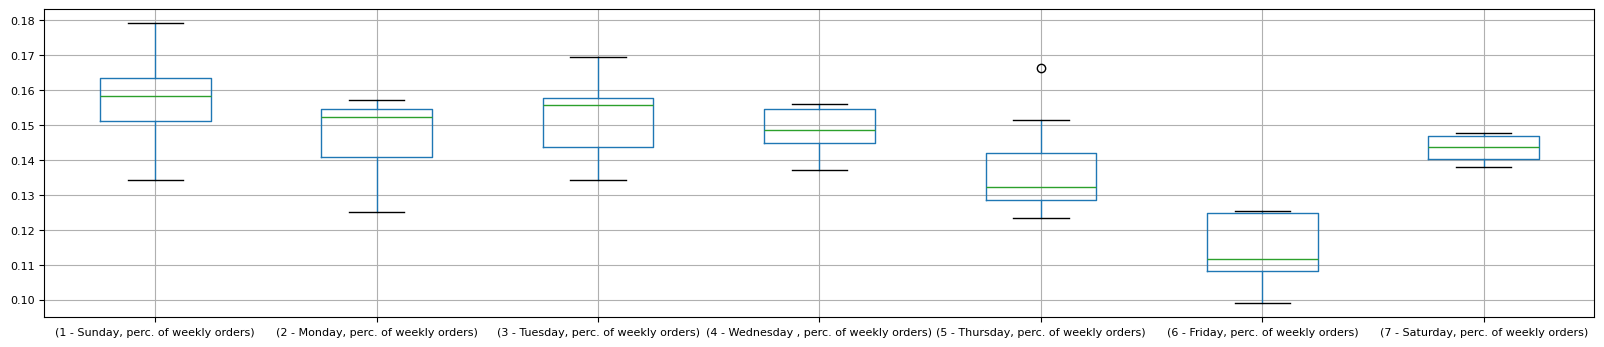

In [163]:
perc_orders_weekly = df_ghana_grouped_2[["Week Day","perc. of weekly orders"]].groupby("Week Day")
perc_orders_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

<Axes: >

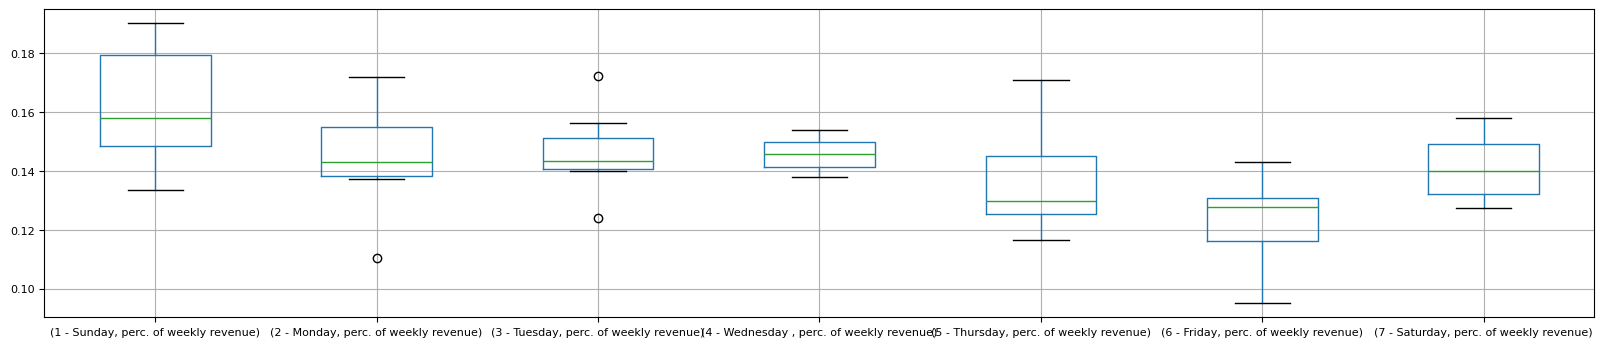

In [164]:
perc_revenue_weekly = df_ghana_grouped_2[["Week Day","perc. of weekly revenue"]].groupby("Week Day")
perc_revenue_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

<Axes: >

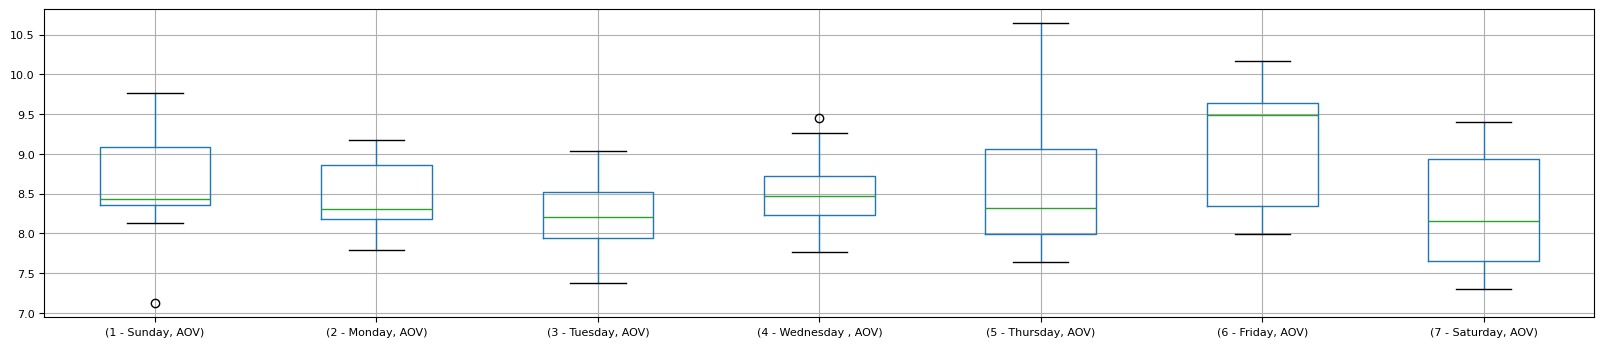

In [165]:
aov_weekly = df_ghana_grouped[["Week Day", "AOV"]].groupby("Week Day")
aov_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

Text(0.5, 1.0, 'Gross Revenue Weekly - Ghana')

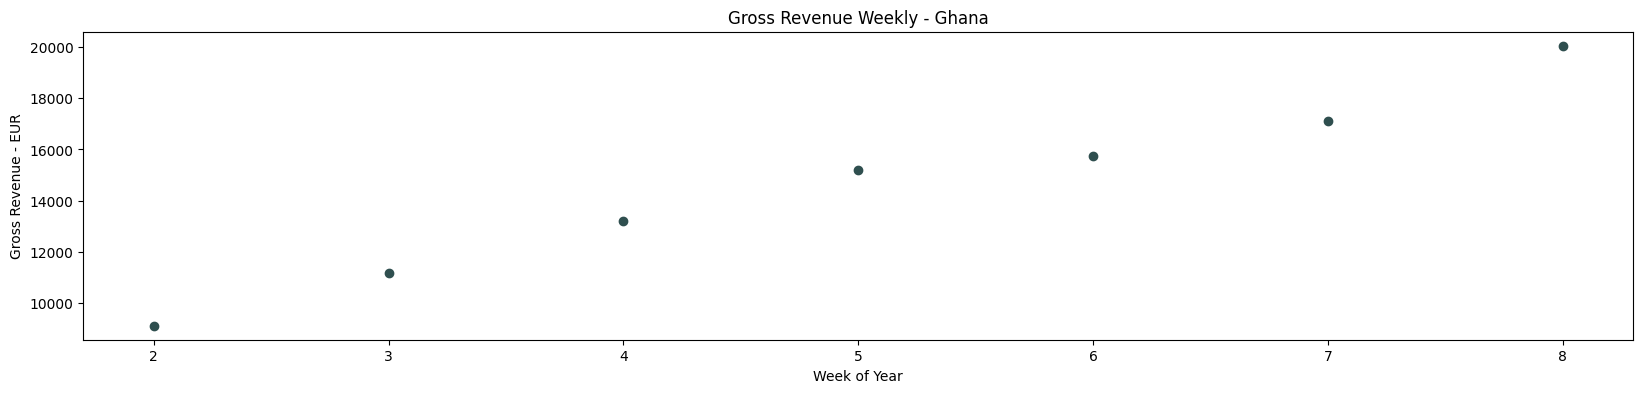

In [175]:
plt.figure(figsize=(20,4))
df_ghana_grouped_week_plot = df_ghana_grouped_week_ref [(df_ghana_grouped_week_ref["Week of Year"] > 1)
                                                              & (df_ghana_grouped_week_ref["Week of Year"] < 9)]
plt.scatter(df_ghana_grouped_week_plot ["Week of Year"]
            , df_ghana_grouped_week_plot ["Order Value € (Gross) (Week)"]
            , color = "darkslategrey")

plt.ylabel("Gross Revenue - EUR")  
plt.xlabel("Week of Year")  
plt.title("Gross Revenue Weekly - Ghana") 

Text(0.5, 1.0, '# Orders Weekly - Ghana')

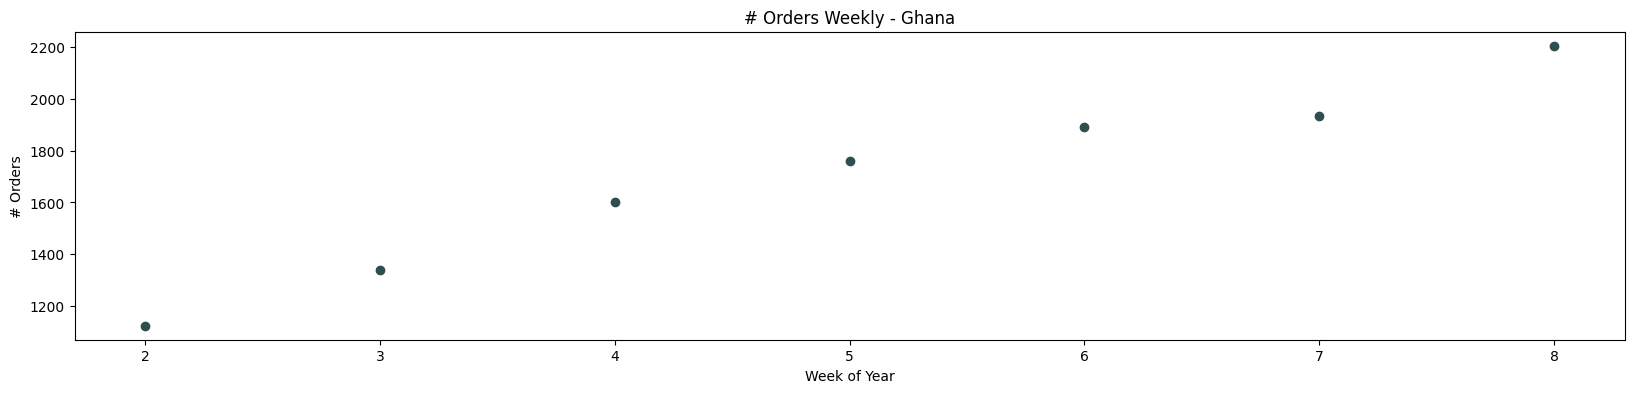

In [177]:
plt.figure(figsize=(20,4))
df_ghana_grouped_week_plot = df_ghana_grouped_week_ref [(df_ghana_grouped_week_ref["Week of Year"] > 1)
                                                              & (df_ghana_grouped_week_ref["Week of Year"] < 9)]
plt.scatter(df_ghana_grouped_week_plot ["Week of Year"]
            , df_ghana_grouped_week_plot ["# Orders (Week)"]
            , color = "darkslategrey")

plt.ylabel("# Orders")  
plt.xlabel("Week of Year")  
plt.title("# Orders Weekly - Ghana") 

##### Conclusions for Ghana:
* a
* b